In [1]:
import pandas as pd

list_of_dfs = [
    "GUI_ENERGY_PRICES_201901010000-202001010000.csv",
    "GUI_ENERGY_PRICES_202001010000-202101010000.csv",
    "GUI_ENERGY_PRICES_202101010000-202201010000.csv",
]

In [2]:
df_full = pd.DataFrame()
for file in list_of_dfs:
    df = pd.read_csv(file, parse_dates=True)
    df_full = pd.concat([df_full, df], ignore_index=True)
df_full


,MTU (UTC),Area,Sequence,Day-ahead Price (EUR/MWh),Intraday Period (UTC),Intraday Price (EUR/MWh)
0,31/12/2018 23:00:00 - 31/12/2018 23:15:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN
1,31/12/2018 23:00:00 - 31/12/2018 23:15:00,BZN|DE-LU,Sequence Sequence 2,40.16,NaN,NaN
2,31/12/2018 23:15:00 - 31/12/2018 23:30:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN
3,31/12/2018 23:15:00 - 31/12/2018 23:30:00,BZN|DE-LU,Sequence Sequence 2,27.51,NaN,NaN
4,31/12/2018 23:30:00 - 31/12/2018 23:45:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN
...,...,...,...,...,...,...
210427,31/12/2021 22:15:00 - 31/12/2021 22:30:00,BZN|DE-LU,Sequence Sequence 2,15.44,NaN,NaN
210428,31/12/2021 22:30:00 - 31/12/2021 22:45:00,BZN|DE-LU,Sequence Sequence 1,6.32,NaN,NaN
210429,31/12/2021 22:30:00 - 31/12/2021 22:45:00,BZN|DE-LU,Sequence Sequence 2,-144.93,NaN,NaN
210430,31/12/2021 22:45:00 - 31/12/2021 23:00:00,BZN|DE-LU,Sequence Sequence 1,6.32,NaN,NaN


In [4]:
df_full[['timestamp', 'timestamp_end']] = df_full['MTU (UTC)'].str.split(' - ', expand=True)
display(df_full.head())
# remove the original 'MTU (UTC)' column
df_full.drop(columns=['MTU (UTC)'], inplace=True)
# drop the 'timestamp_end' column
df_full.drop(columns=['timestamp_end'], inplace=True)
# drop Intraday Period (UTC) Intraday Price (EUR/MWh) Area	
df_full.drop(columns=['Intraday Period (UTC)', 'Intraday Price (EUR/MWh)', 'Area'], inplace=True)
# filter only for Sequence = Sequence Sequence 1
df_full["Day-ahead Price (EUR/MWh)_hourly"] = df_full[df_full['Sequence'] == 'Sequence Sequence 1']["Day-ahead Price (EUR/MWh)"]
df_full["Day-ahead Price (EUR/MWh)_quarterly"] = df_full[df_full['Sequence'] == 'Sequence Sequence 2']["Day-ahead Price (EUR/MWh)"]
# drop the 'Sequence' column
#save the cleaned DataFrame to a new CSV file
df_full.drop(columns=['Sequence'], inplace=True)
# remove"Day-ahead Price (EUR/MWh)"
df_full.drop(columns=['Day-ahead Price (EUR/MWh)'], inplace=True)
# convert the time series format from 31/12/2018 23:00:00 to 2018-05-13 09:00:00+00:00
# convert the timestamp strings to UTC datetimes
df_full['timestamp'] = pd.to_datetime(df_full['timestamp'], format='%d/%m/%Y %H:%M:%S', utc=True)

# remove any duplicated columns
df_full = df_full.loc[:, ~df_full.columns.duplicated()]

# set the timestamp as index (after conversion)
df_full.set_index('timestamp', inplace=True)

# save
#df_full.to_csv('cleaned_energy_prices.csv')

,MTU (UTC),Area,Sequence,Day-ahead Price (EUR/MWh),Intraday Period (UTC),Intraday Price (EUR/MWh),timestamp,timestamp_end
0,31/12/2018 23:00:00 - 31/12/2018 23:15:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN,31/12/2018 23:00:00,31/12/2018 23:15:00
1,31/12/2018 23:00:00 - 31/12/2018 23:15:00,BZN|DE-LU,Sequence Sequence 2,40.16,NaN,NaN,31/12/2018 23:00:00,31/12/2018 23:15:00
2,31/12/2018 23:15:00 - 31/12/2018 23:30:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN,31/12/2018 23:15:00,31/12/2018 23:30:00
3,31/12/2018 23:15:00 - 31/12/2018 23:30:00,BZN|DE-LU,Sequence Sequence 2,27.51,NaN,NaN,31/12/2018 23:15:00,31/12/2018 23:30:00
4,31/12/2018 23:30:00 - 31/12/2018 23:45:00,BZN|DE-LU,Sequence Sequence 1,28.32,NaN,NaN,31/12/2018 23:30:00,31/12/2018 23:45:00


<Axes: xlabel='timestamp'>

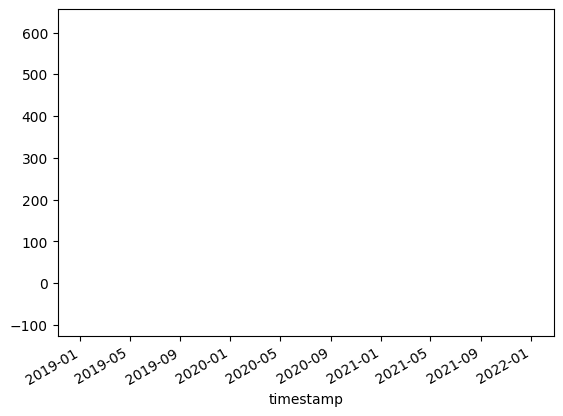

<Axes: xlabel='timestamp'>

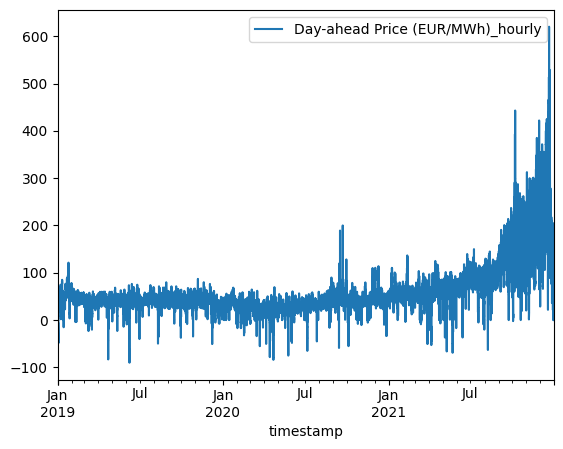

In [9]:
# combine rows with the same timestamp, taking the non-null value for each column
df_full = df_full.groupby(level=0).agg({
    "Day-ahead Price (EUR/MWh)_hourly": "first",
})

# (re)save if needed
#df_full.to_csv("cleaned_energy_prices.csv")

display(df_full.plot())